# Аналитика в авиакомпании

Вы аналитик компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.



**Цель исследования** – изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

Даны файлы, в которых содержатся результаты запросов из предыдущих заданий.

<b>/datasets/query_1.csv</b> — результат первого запроса. В нём содержится информация о:

model — модели самолета <br>
flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года<br>


<br><b>/datasets/query_3.csv</b> — результат третьего запроса. В нём содержится информация о:

city — городах <br>
average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года <br>


<br><b>Для этих двух наборов данных нужно:<br></b>
   - импортировать файлы;
   - изучить данные в них;
   - проверить типы данных на корректность;
   - выбрать топ-10 городов по количеству рейсов;
   - построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов; сделать выводы по каждому из графиков, пояснить результат.

_____

<b>1. Импорт данных и их изучение

In [1]:
import pandas as pd
flight_models_data = pd.read_csv('/datasets/query_1.csv') #файл с информацией о модели самолета и их полетах в сентябре 2018
city_avg_flights = pd.read_csv('/datasets/query_3.csv') #файл с информацией о городах и полетах в августе 2018

In [2]:
flight_models_data

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [3]:
flight_models_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
flight_models_data.duplicated().sum()

0

Датафрейм содержит 8 строк и 2 столбца. Пропусков и дубликатов нет.

In [5]:
city_avg_flights

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [6]:
city_avg_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [7]:
city_avg_flights.duplicated().sum()

0

<b>Вывод

Датафрейм содержит 101 строку и 2 столбца. Пропусков и дубликатов нет, типы данных в порядке.

<b>2. Построение графиков

<b>2.1 Города и количество рейсов

In [8]:
#таблица городов по количеству рейсов
city_avg_flights.sort_values(by='average_flights', ascending=False)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
...,...,...
22,Ижевск,1.000000
65,Петропавловск-Камчатский,1.000000
31,Комсомольск-на-Амуре,1.000000
58,Нягань,1.000000


In [9]:
city_avg_flights.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


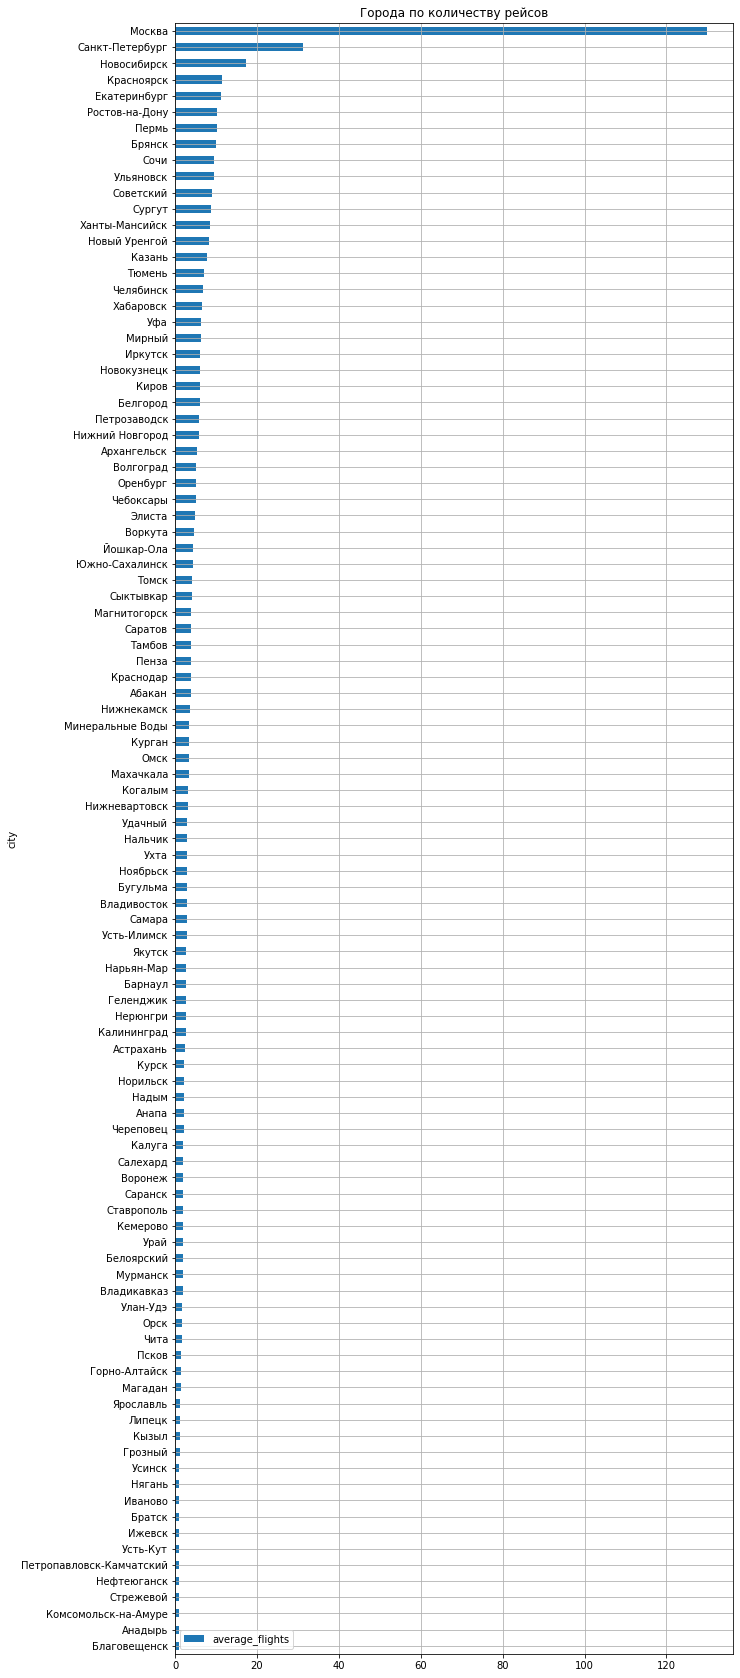

In [10]:
#график городов по количеству рейсов
import matplotlib.pyplot as plt
city_avg_flights.sort_values(by='average_flights').\
    plot(x='city', y='average_flights', kind='barh', grid=True, figsize=(10, 30),\
    title='Города по количеству рейсов')

<b>Вывод

В августе 2018 в Москве прибыло самое большое среднее количество рейсов в день – 129,8 рейсов. Это в разы больше, чем в других городах. Следующий город по количеству рейсов – Санкт-Петербург (31,2 рейса в день), следом – Новосибирск (17,3 рейсов в день). В остальных городах среднее количество рейсов не превышает 11,6 в день. В среднем в августе 2018 совершалось 3 рейса в день по всем городам.


Такой спрос в крупные города может быть связан с сезоном отпусков горожан как с туристической целью, так и с целью возвращения домой, учитывая более высокий доход жителей крупных городов, а значит, бо'льшие возможности для путешествий. Это также может быть связано с началом учебного года у школьников и студентов, когда обучающиеся возврашаются к месту учебы и подготавливаются к началу семестра. Для подтверждения этой версии нужно проверить среднее количество приездов в день в течение более длительного срока. 

<b>2.2 Топ-10 городов по количеству рейсов

In [11]:
#таблица топ-10 городов по количеству рейсов
top10_city_avg_flights_plot = city_avg_flights.sort_values(by='average_flights', ascending=False).head(10)
top10_city_avg_flights_plot

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


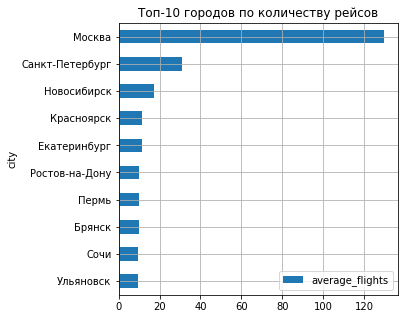

In [12]:
#график топ-10 городов по количеству рейсов
top10_city_avg_flights_plot.sort_values(by='average_flights').\
    plot(x='city', y='average_flights', kind='barh', grid=True, figsize=(5, 5),\
    title='Топ-10 городов по количеству рейсов')

<b>Вывод

На графике показаны топ-10 городов по среднему количеству прилетов в день в течение августа 2018. В Москве самое большое среднее количество прибывающих рейсов в день – 129,8 рейсов. Следующий город по количеству рейсов – Санкт-Петербург (31,2 рейса в день), следом – Новосибирск (17,3 рейсов в день). В остальных городах среднее количество рейсов варьируется от 9,6 до 11,6 в день.


Такое большое количество прилетов в крупные города может быть обусловлено не только внутринними туристическими поездками и началом учебного года, но и большим количеством пересадок перед дальнейшими перелетами. В этих городах представлено больше российских и иностранных авиаперевозчиков, а значит гораздо больше возможностей для жителей маленьких городов путешествовать по России и за рубеж, а также приезда иностранцев. Вероятно пассажиры осуществляют пересадки в крупных международных аэропортах либо прилетают в город по работе или для туризма. 

<b>2.3 Модели самолетов и количество рейсов

In [17]:
#таблица моделей самолетов и их количества рейсов
flight_models_data = flight_models_data.sort_values(by='flights_amount', ascending=False)
flight_models_data

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


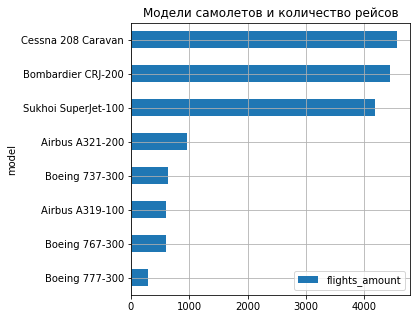

In [14]:
#график моделей самолетов и их количества рейсов
flight_models_data.sort_values(by='flights_amount').\
    plot(x='model', y='flights_amount', kind='barh', grid=True, figsize=(5, 5),\
    title='Модели самолетов и количество рейсов')

<b>Вывод

Самый частые перелеты совершили на моделях Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100. В сентябре 2018 года на этих моделях было совершено 4557, 4446 и 4185 рейсов соответственно. В то же время количество рейсов на моделях Airbus и Boeing не превышали 960 рейсов. 


Самые частые перелеты были осуществлены на самолетах Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100. Это достаточно маломестные модели: Cessna 208 Caravan – 13 мест, Bombardier CRJ-200 – 50 мест, Sukhoi SuperJet-100 – 103 места. Такие самолеты достаточно маленькие и могут быть частными, поэтому летают гораздо чаще по сравнению с огромными авиалайнерами, продажа билетов на которые требует большего времени. Самолеты моделей Airbus и Boeing как раз вмещают от 149 до 550 человек: Airbus A321-200 – 220 мест, Boeing 737-300 – 149 мест, Airbus A319-100 – до 156, Boeing 767-300 – более 300, Boeing 777-300 – 550 мест. Такие самолеты летают на более дальние расстояния и гораздо реже маленьких и частных самолетов.


# <b>Общий вывод

Проанализированы данные из файлов с информацией о моделях самолетов и их полетах в сентябре 2018, а также о городах и полетах в августе 2018.
<br>
<br>
В августе 2018 в Москве прибыло самое большое среднее количество рейсов в день – 129,8 рейсов. Это в разы больше, чем в других городах. Следующий город по количеству рейсов – Санкт-Петербург (31,2 рейса в день), следом – Новосибирск (17,3 рейсов в день). В остальных городах среднее количество рейсов не превышает 11,6 в день. В среднем в августе 2018 совершалось 3 рейса в день по всем городам.
<br>
<br>
Такой спрос в крупные города может быть связан с сезоном отпусков горожан и иностранцев, приезжающих в крупные города и возвращающихся домой, с началом учебного года у школьников и студентов. В крупных городах представлено больше российских и иностранных авиаперевозчиков, поэтому вероятно пассажиры осуществляют пересадки в международных аэропортах для дальнейших перелетов. 
<br>
<br>
Самый популярные рейсы выполнялись на моделях Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100. В сентябре 2018 года на этих моделях было совершено 4557, 4446 и 4185 полетов соответственно. Количество рейсов на моделях Airbus и Boeing не превышали 960 рейсов. Маломестные самолеты совершают более частые перелеты с небольшим количеством пассажиров, в то время как большим авиалайнерам требуется больше времени на продажу билетов и перелет. 
<br>
<br>
Для подтверждения этих версий нужно проанализировать среднее количество приездов в день в течение более длительного срока, а также реестр количества прибывших пассажиров с каждого рейса помесячно.